# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!pip install --upgrade folium

import warnings
warnings.filterwarnings('ignore')

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
go.Layout()

Layout()

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [4]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [5]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/12/22  2/13/22  2/14/22  \
0        0        0        0        0  ...   170152   170604   171246   
1        0        0        0        0  ...   267551   268008   268304   
2        0        0        0        0  ...   261226   261752   262165   
3        0        0        0        0  ...    37140    37140    37277   
4        0        0        0        0  ...    98514    98514    98514   

   2/15/22  2/16/22  2/17/22  2/18/22  2/19/22  2/20/22  2/21/22  
0   171422   171519   171673   171857   171931   172205   172441  
1   268491   268940   269301   269601   269904   270164   270370  
2   262570   262994   263369   263685   263936   264054   264201  
3    37361    37452    37522    37589    37589    37589    37589  
4    98555    98568    98585    98605    98617    98638    98658  

[5 rows x 766 columns]

In [6]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/12/22  2/13/22  2/14/22  \
0        0        0        0        0  ...     7488     7494     7501   
1        0        0        0        0  ...     3407     3410     3414   
2        0        0        0        0  ...     6715     6729     6744   
3        0        0        0        0  ...      148      148      149   
4        0        0        0        0  ...     1898     1898     1898   

   2/15/22  2/16/22  2/17/22  2/18/22  2/19/22  2/20/22  2/21/22  
0     7504     7513     7524     7526     7534     7539     7549  
1     3420     3423     3430     3432     3433     3438     3445  
2     6753     6762     6772     6780     6787     6797     6805  
3      150      150      150      150      150      150      150  
4     1899     1899     1899     1899     1899     1899     1899  

[5 rows x 766 columns]

In [7]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/12/22  2/13/22  2/14/22  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...        0        0        0   
2        0        0        0        0  ...        0        0        0   
3        0        0        0        0  ...        0        0        0   
4        0        0        0        0  ...        0        0        0   

   2/15/22  2/16/22  2/17/22  2/18/22  2/19/22  2/20/22  2/21/22  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 766 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [8]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

In [9]:
#total confirmed cases
total_confirmed_df = pd.DataFrame(confirmed.sum(axis=0))
total_confirmed_df.columns = ['total']
total_cases = total_confirmed_df['total'].tolist() #append to total_cases list

In [10]:
#total deaths
total_death_df = pd.DataFrame(deaths.sum(axis=0))
total_death_df.columns = ['total']
total_deaths = total_death_df['total'].tolist() #append to total_deaths list

In [11]:
#total recoveries
total_recovered_df = pd.DataFrame(recoveries.sum(axis=0))
total_recovered_df.columns = ['total']
total_recovered = total_recovered_df['total'].tolist() #append to total_recovered list

In [12]:
#total active
total_active_df = pd.DataFrame(confirmed.sum(axis=0) - recoveries.sum(axis=0) - deaths.sum(axis=0))
total_active_df.columns = ['total']
total_active = total_active_df['total'].tolist() #append to total_active list

In [13]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  425942146
Total death cases:  5890994
Total recoveries cases:  0
Total active cases:  420051152


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

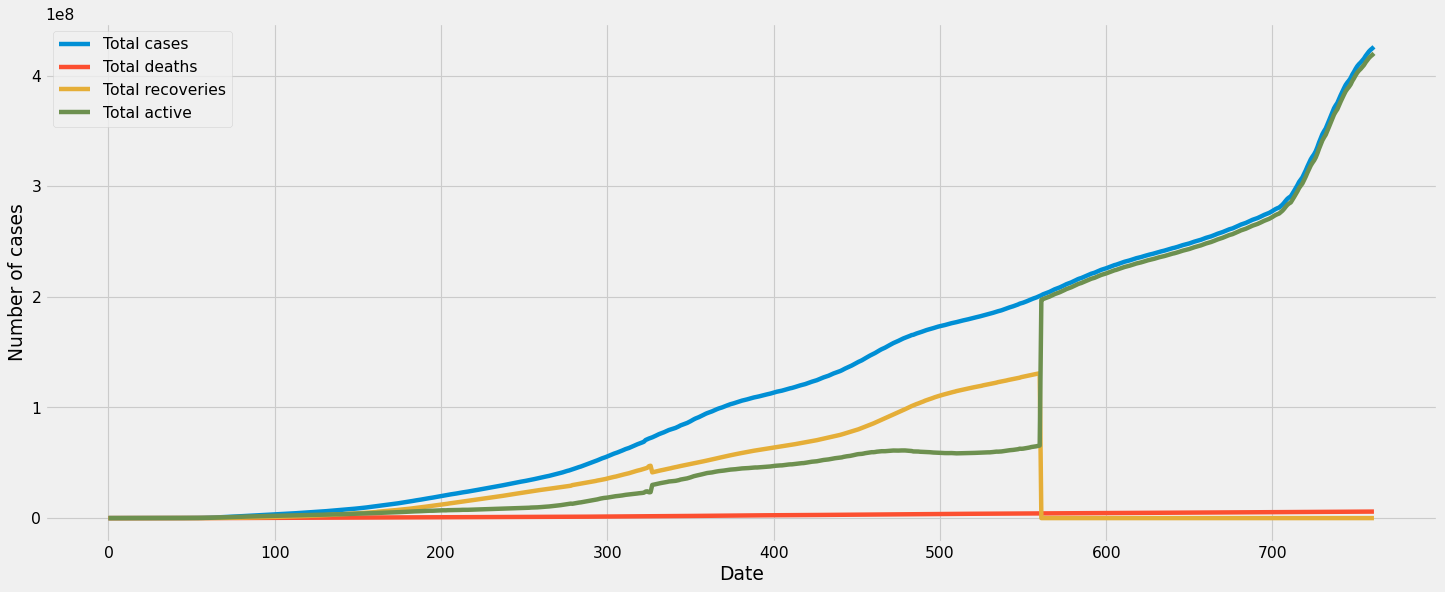

In [14]:
#Insert your code here:
from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=80)

plt.plot(adjusted_dates, total_cases, label = 'Total cases')
plt.plot(adjusted_dates, total_deaths, label = 'Total deaths')
plt.plot(adjusted_dates, total_recovered, label = 'Total recoveries')
plt.plot(adjusted_dates, total_active,  label = 'Total active')

plt.legend()
plt.ylabel("Number of cases")  # add y-axis label
plt.xlabel("Date")  # add x-axis label
plt.show()

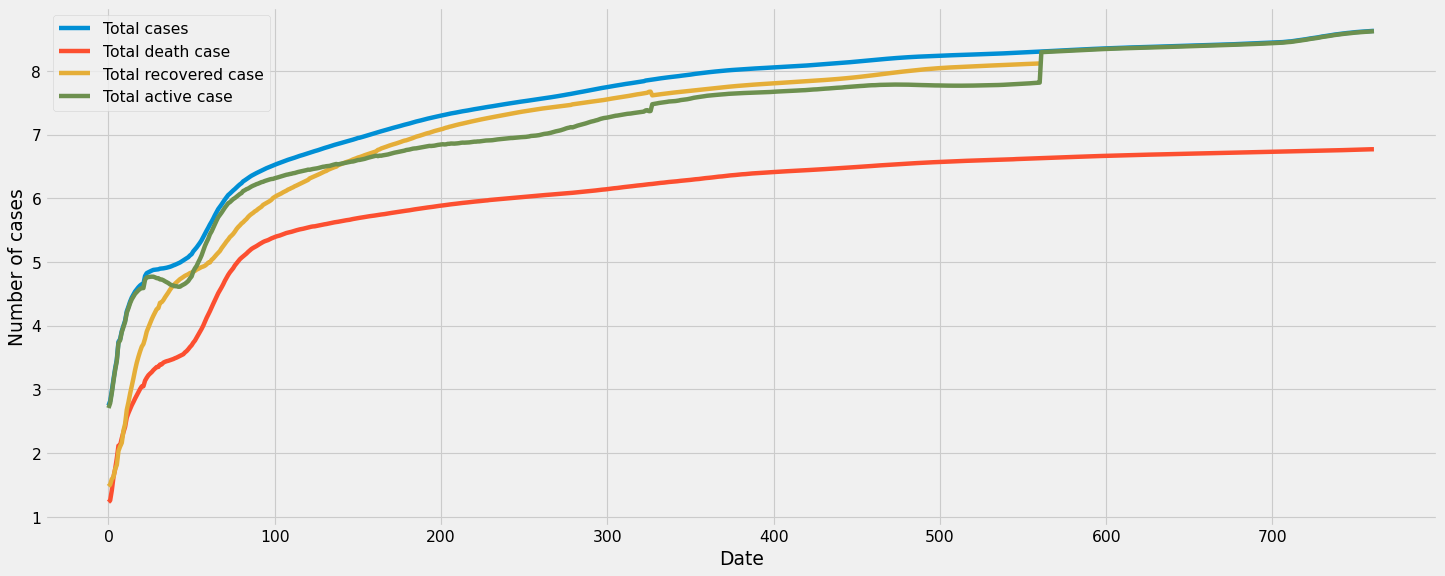

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=80)
import math

log10_total_cases     = np.log10(np.array(total_cases))
log10_total_deaths    = np.log10(np.array(total_deaths))
log10_total_recovered = np.log10(np.array(total_recovered))
log10_total_active    = np.log10(np.array(total_active))

plt.plot(adjusted_dates, log10_total_cases, label = 'Total cases')
plt.plot(adjusted_dates, log10_total_deaths, label = 'Total death case')
plt.plot(adjusted_dates, log10_total_recovered, label = 'Total recovered case')
plt.plot(adjusted_dates, log10_total_active,  label = 'Total active case')

plt.legend()
plt.ylabel("Number of cases")  # add y-axis label
plt.xlabel("Date")  # add x-axis label
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

Text(0, 0.5, 'Number of cases')

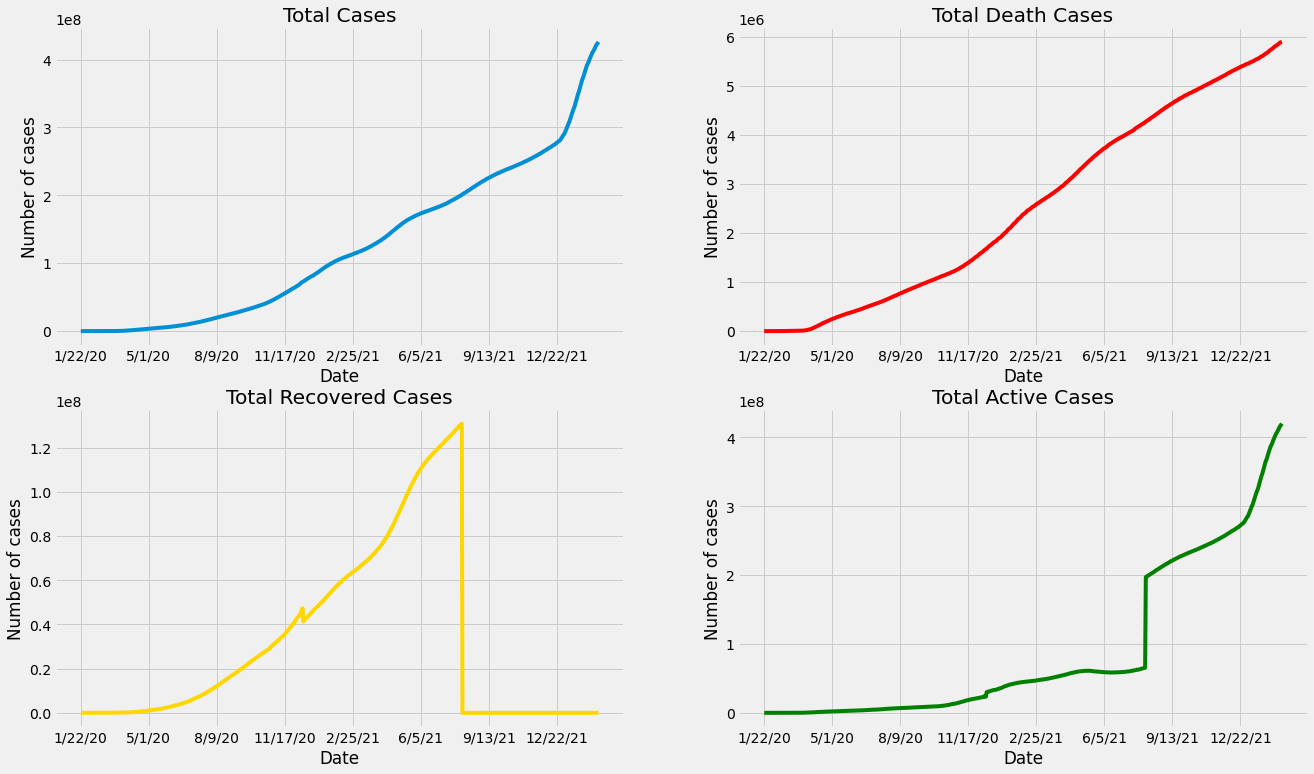

In [16]:
#Insert your code here:
fig = plt.figure()

ax0 = fig.add_subplot(221) 
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

total_confirmed_df.plot(kind='line', figsize=(20, 12), ax=ax0, legend = None)
ax0.set_title('Total Cases')
ax0.set_xlabel('Date')
ax0.set_ylabel('Number of cases')

total_death_df.plot(kind='line', figsize=(20, 12), ax=ax1, color = 'red', legend = None)
ax1.set_title('Total Death Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of cases')

total_recovered_df.plot(kind='line', figsize=(20, 12), ax=ax2, color = 'gold', legend = None)
ax2.set_title('Total Recovered Cases')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of cases')

total_active_df.plot(kind='line', figsize=(20, 12), ax=ax3, color = 'green', legend = None)
ax3.set_title('Total Active Cases')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of cases')

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [17]:
#Insert your code here:
for i in total_confirmed_df['total']:
    total_confirmed_df['daily increase'] = total_confirmed_df['total'].diff()
    
for i in total_death_df['total']:
    total_death_df['daily increase'] = total_death_df['total'].diff()
    
for i in total_recovered_df['total']:
    total_recovered_df['daily increase'] = total_recovered_df['total'].diff()
    
for i in total_active_df['total']:
    total_active_df['daily increase'] = total_active_df['total'].diff()

In [18]:
total_confirmed_df

total  daily increase
1/22/20        557             NaN
1/23/20        655            98.0
1/24/20        941           286.0
1/25/20       1434           493.0
1/26/20       2118           684.0
...            ...             ...
2/17/22  419765134       2031656.0
2/18/22  421718022       1952888.0
2/19/22  423254960       1536938.0
2/20/22  424509979       1255019.0
2/21/22  425942146       1432167.0

[762 rows x 2 columns]

In [19]:
total_death_df

total  daily increase
1/22/20       17             NaN
1/23/20       18             1.0
1/24/20       26             8.0
1/25/20       42            16.0
1/26/20       56            14.0
...          ...             ...
2/17/22  5863463         12714.0
2/18/22  5874048         10585.0
2/19/22  5882396          8348.0
2/20/22  5887700          5304.0
2/21/22  5890994          3294.0

[762 rows x 2 columns]

In [20]:
total_recovered_df

total  daily increase
1/22/20     30             NaN
1/23/20     32             2.0
1/24/20     39             7.0
1/25/20     42             3.0
1/26/20     56            14.0
...        ...             ...
2/17/22      0             0.0
2/18/22      0             0.0
2/19/22      0             0.0
2/20/22      0             0.0
2/21/22      0             0.0

[762 rows x 2 columns]

In [21]:
total_active_df

total  daily increase
1/22/20        510             NaN
1/23/20        605            95.0
1/24/20        876           271.0
1/25/20       1350           474.0
1/26/20       2006           656.0
...            ...             ...
2/17/22  413901671       2018942.0
2/18/22  415843974       1942303.0
2/19/22  417372564       1528590.0
2/20/22  418622279       1249715.0
2/21/22  420051152       1428873.0

[762 rows x 2 columns]

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

Text(0.5, 0, 'Date')

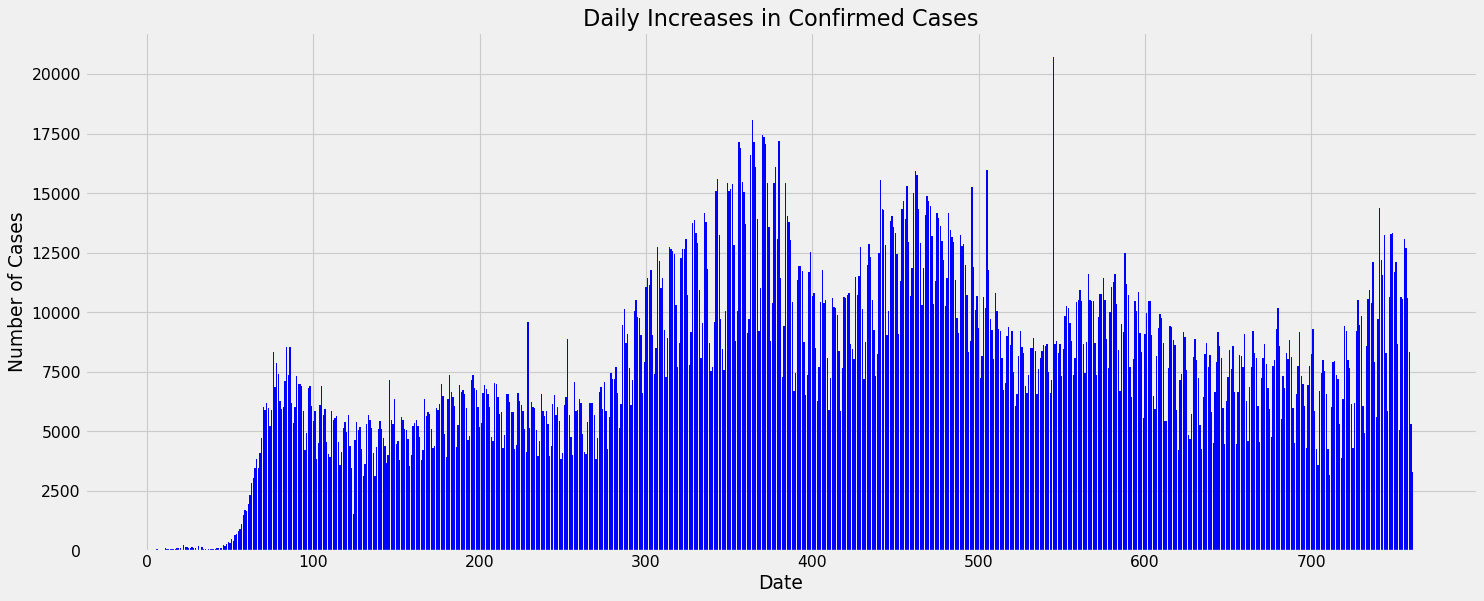

In [22]:
figure(figsize=(20, 8), dpi=80)
plt.bar(adjusted_dates,total_death_df['daily increase'], color = 'blue')
plt.title('Daily Increases in Confirmed Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

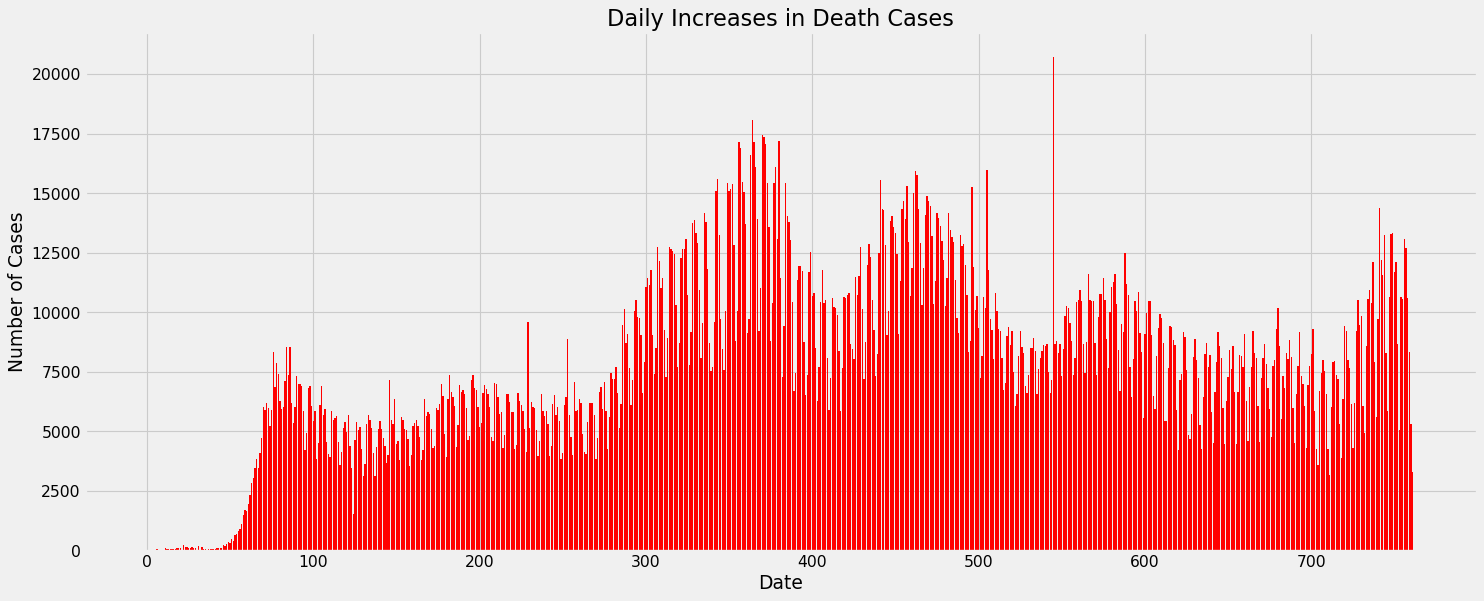

In [23]:
figure(figsize=(20, 8), dpi=80)
plt.bar(adjusted_dates,total_death_df['daily increase'], color = 'red')
plt.title('Daily Increases in Death Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

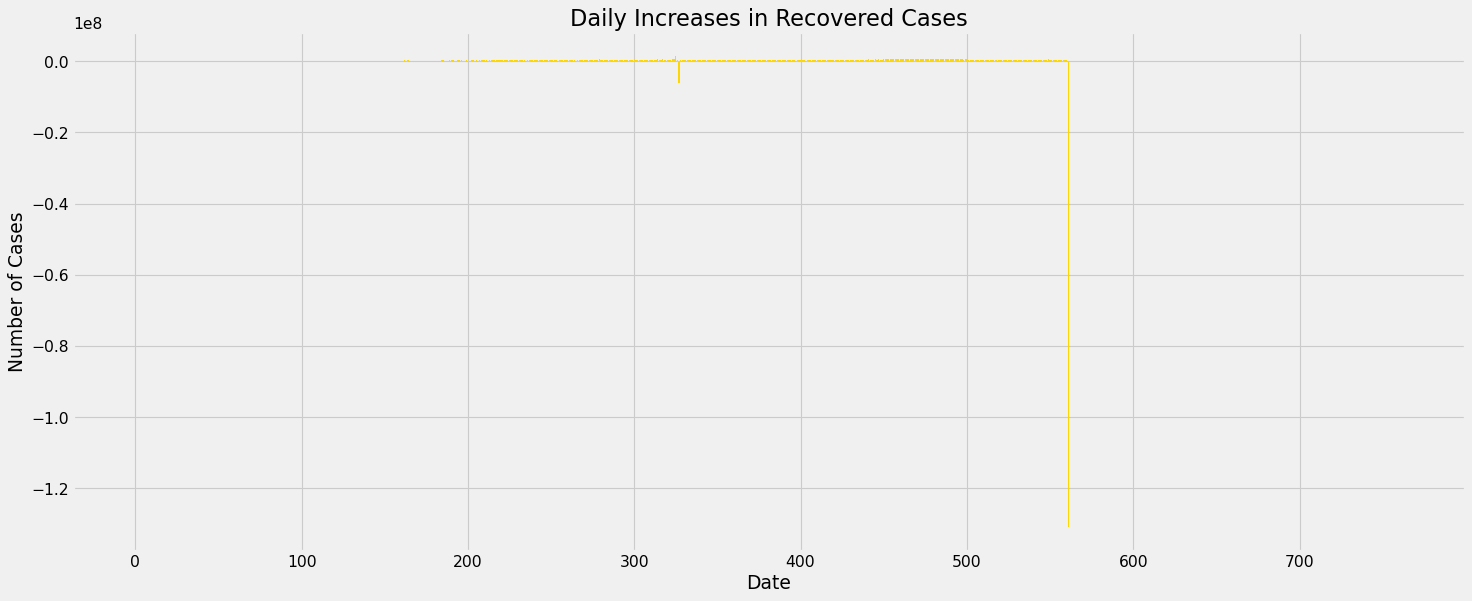

In [24]:
figure(figsize=(20, 8), dpi=80)
plt.bar(adjusted_dates,total_recovered_df['daily increase'], color = 'gold')
plt.title('Daily Increases in Recovered Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

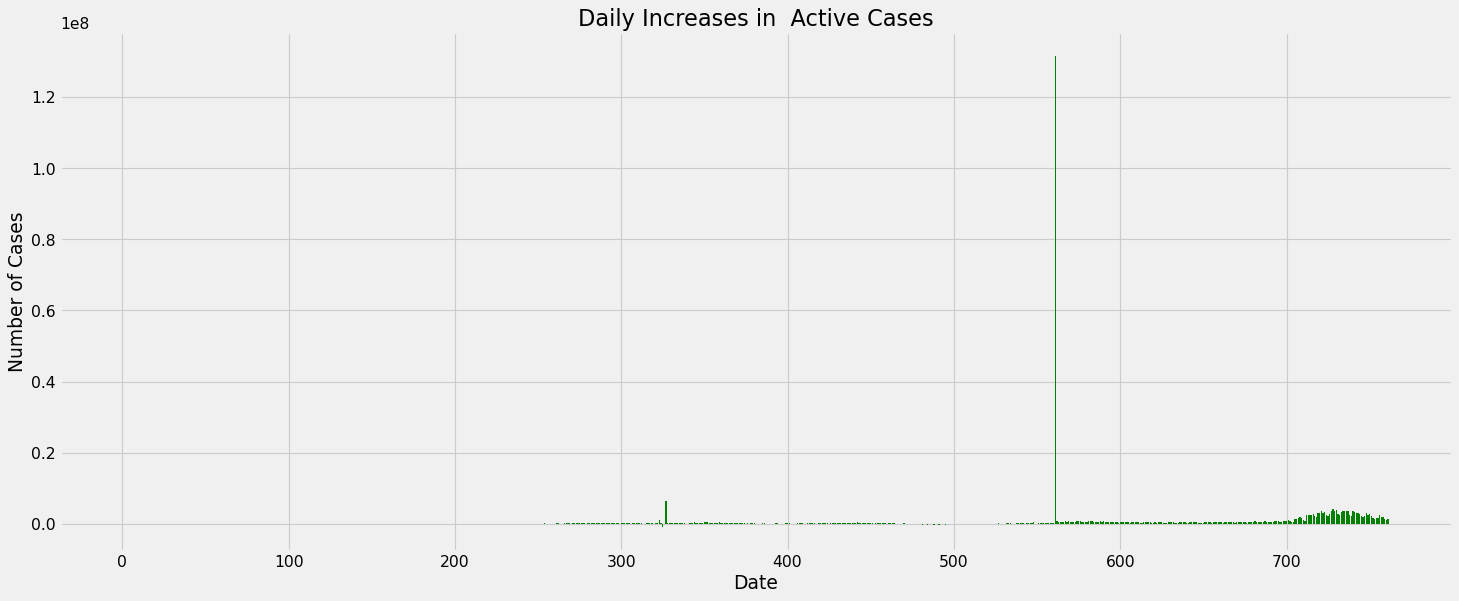

In [25]:
figure(figsize=(20, 8), dpi=80)
plt.bar(adjusted_dates,total_active_df['daily increase'], color = 'green')
plt.title('Daily Increases in  Active Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [26]:
#Insert your code here:
total_death_df['mortality rate'] = [round(total_deaths[i] * 100.0 / total_cases[i],2) for i in range(len(total_death_df))]
total_death_df

total  daily increase  mortality rate
1/22/20       17             NaN            3.05
1/23/20       18             1.0            2.75
1/24/20       26             8.0            2.76
1/25/20       42            16.0            2.93
1/26/20       56            14.0            2.64
...          ...             ...             ...
2/17/22  5863463         12714.0            1.40
2/18/22  5874048         10585.0            1.39
2/19/22  5882396          8348.0            1.39
2/20/22  5887700          5304.0            1.39
2/21/22  5890994          3294.0            1.38

[762 rows x 3 columns]

In [27]:
average_mortality_rate  = total_death_df['mortality rate'].mean()
average_mortality_rate 

2.975629921259847

In [28]:
total_recovered_df['recovered rate'] = [round(total_recovered[i] * 100.0 / total_cases[i],2) for i in range(len(total_recovered_df))]
total_recovered_df

total  daily increase  recovered rate
1/22/20     30             NaN            5.39
1/23/20     32             2.0            4.89
1/24/20     39             7.0            4.14
1/25/20     42             3.0            2.93
1/26/20     56            14.0            2.64
...        ...             ...             ...
2/17/22      0             0.0            0.00
2/18/22      0             0.0            0.00
2/19/22      0             0.0            0.00
2/20/22      0             0.0            0.00
2/21/22      0             0.0            0.00

[762 rows x 3 columns]

In [29]:
average_recovered_rate = total_recovered_df['recovered rate'].mean()
average_recovered_rate

38.81329396325459

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

In [30]:
#create a average mortality line
average_mortality_rate = [average_mortality_rate] * len(total_death_df['mortality rate'])

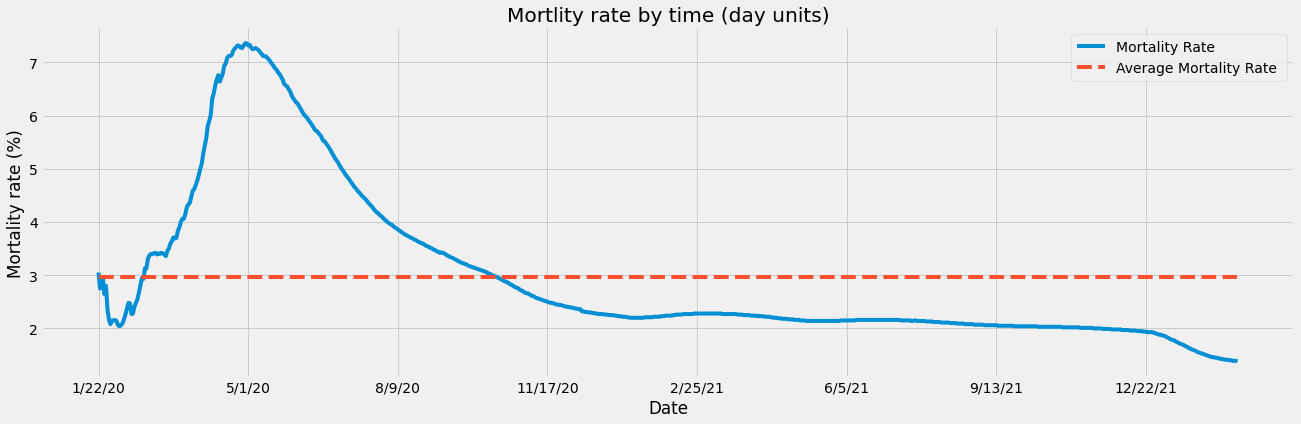

In [31]:
#Insert your code here:
total_death_df['mortality rate'].plot(kind='line', figsize=(20, 6), label='Mortality Rate ')
plt.plot( dates, average_mortality_rate, linestyle = 'dashed', label='Average Mortality Rate ')
plt.legend()
plt.title('Mortlity rate by time (day units)')
plt.ylabel("Mortality rate (%)")  # add y-axis label
plt.xlabel("Date")  # add x-axis label
plt.show()

**7.2** 

    Visualize the recovered rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovered rate of all the time.

In [32]:
#create a average recovered line
average_recovered_rate = [average_recovered_rate] * len(total_recovered_df['recovered rate'])

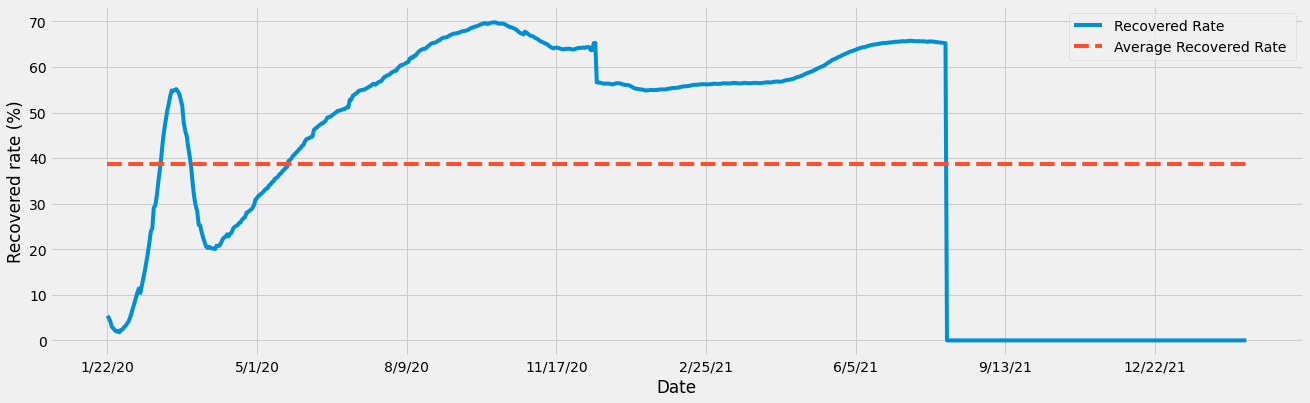

In [33]:
#Insert your code here:
total_recovered_df['recovered rate'].plot(kind='line', figsize=(20, 6), label='Recovered Rate ')
plt.plot( dates, average_recovered_rate, linestyle = 'dashed', label='Average Recovered Rate ')
plt.legend()
plt.ylabel("Recovered rate (%)")  # add y-axis label
plt.xlabel("Date")  # add x-axis label
plt.show()

#  5. Continent Analysis

## Data Prerocessing

In [34]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}


# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
         return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [35]:
confirmed_df.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
confirmed_df

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
279            NaN    West Bank and Gaza    Others  31.952200   35.233200   
280            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
281            NaN                 Yemen      Asia  15.552727   48.516388   
282            NaN                Zambia    Africa -13.133897   27.849332   
283            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  2/12/22  2/13/22  \
0          0        0        0        0        0  ...   170152   170604   
1          0        0        0        0        0  ...   267551   268008   
2          0        0        0        0        0  ...   261226   261752   
3          0        0        0        0        0  ...    37140    37140   
4          0        0        0        0        0  ...    98514    98514   
..       ...      ...      ...      ...      ...  ...      ...      ...   
279        0        0        0        0        0  ...   600128   600128   
280        0        0        0        0        0  ...      498      501   
281        0        0        0        0        0  ...    11664    11671   
282        0        0        0        0        0  ...   309293   309502   
283        0        0        0        0        0  ...   231299   231381   

     2/14/22  2/15/22  2/16/22  2/17/22  2/18/22  2/19/22  2/20/22  2/21/22  
0     171246   171422   171519   171673   171857   171931   172205   172441  
1     268304   268491   268940   269301   269601   269904   270164   270370  
2     262165   262570   262994   263369   263685   263936   264054   264201  
3      37277    37361    37452    37522    37589    37589    37589    37589  
4      98514    98555    98568    98585    98605    98617    98638    98658  
..       ...      ...      ...      ...      ...      ...      ...      ...  
279   613846   618527   622175   625028   627956   627956   627956   633684  
280      501      505      507      507      508      508      509      509  
281    11679    11699    11707    11718    11731    11731    11736    11741  
282   309579   309870   310155   310474   310764   311016   311194   311264  
283   231603   231603   232213   232598   233030   233224   233352   233571  

[284 rows x 767 columns]

In [36]:
deaths_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
deaths_df

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
279            NaN    West Bank and Gaza    Others  31.952200   35.233200   
280            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
281            NaN                 Yemen      Asia  15.552727   48.516388   
282            NaN                Zambia    Africa -13.133897   27.849332   
283            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  2/12/22  2/13/22  \
0          0        0        0        0        0  ...     7488     7494   
1          0        0        0        0        0  ...     3407     3410   
2          0        0        0        0        0  ...     6715     6729   
3          0        0        0        0        0  ...      148      148   
4          0        0        0        0        0  ...     1898     1898   
..       ...      ...      ...      ...      ...  ...      ...      ...   
279        0        0        0        0        0  ...     5215     5215   
280        0        0        0        0        0  ...        0        0   
281        0        0        0        0        0  ...     2102     2103   
282        0        0        0        0        0  ...     3937     3937   
283        0        0        0        0        0  ...     5374     5374   

     2/14/22  2/15/22  2/16/22  2/17/22  2/18/22  2/19/22  2/20/22  2/21/22  
0       7501     7504     7513     7524     7526     7534     7539     7549  
1       3414     3420     3423     3430     3432     3433     3438     3445  
2       6744     6753     6762     6772     6780     6787     6797     6805  
3        149      150      150      150      150      150      150      150  
4       1898     1899     1899     1899     1899     1899     1899     1899  
..       ...      ...      ...      ...      ...      ...      ...      ...  
279     5283     5296     5320     5339     5357     5357     5357     5406  
280        0        0        0        0        0        0        0        0  
281     2107     2107     2113     2114     2115     2120     2122     2123  
282     3938     3939     3939     3941     3942     3943     3943     3945  
283     5374     5374     5379     5381     5385     5386     5386     5386  

[284 rows x 767 columns]

In [37]:
recoveries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries2[:]] )
recoveries_df

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
264            NaN    West Bank and Gaza    Others  31.952200   35.233200   
265            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
266            NaN                 Yemen      Asia  15.552727   48.516388   
267            NaN                Zambia    Africa -13.133897   27.849332   
268            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  2/12/22  2/13/22  \
0          0        0        0        0        0  ...        0        0   
1          0        0        0        0        0  ...        0        0   
2          0        0        0        0        0  ...        0        0   
3          0        0        0        0        0  ...        0        0   
4          0        0        0        0        0  ...        0        0   
..       ...      ...      ...      ...      ...  ...      ...      ...   
264        0        0        0        0        0  ...        0        0   
265        0        0        0        0        0  ...        0        0   
266        0        0        0        0        0  ...        0        0   
267        0        0        0        0        0  ...        0        0   
268        0        0        0        0        0  ...        0        0   

     2/14/22  2/15/22  2/16/22  2/17/22  2/18/22  2/19/22  2/20/22  2/21/22  
0          0        0        0        0        0        0        0        0  
1          0        0        0        0        0        0        0        0  
2          0        0        0        0        0        0        0        0  
3          0        0        0        0        0        0        0        0  
4          0        0        0        0        0        0        0        0  
..       ...      ...      ...      ...      ...      ...      ...      ...  
264        0        0        0        0        0        0        0        0  
265        0        0        0        0        0        0        0        0  
266        0        0        0        0        0        0        0        0  
267        0        0        0        0        0        0        0        0  
268        0        0        0        0        0        0        0        0  

[269 rows x 767 columns]

In [38]:
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recoveries_df = recoveries_df.replace(np.nan, '', regex=True)

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [39]:
#Insert your code here:
data = [confirmed_df['continent'], confirmed_df['Country/Region'], confirmed.iloc[:,-1], deaths.iloc[:,-1], recoveries.iloc[:,-1],
       confirmed.iloc[:,-1] - deaths.iloc[:,-1] - recoveries.iloc[:,-1]]
countries_df = pd.DataFrame(data).transpose()
countries_df.columns = ['continent','Country/Region','Confirmed','Deaths','Recoveries','Active']
countries_df = countries_df.groupby(['Country/Region']).sum()
#calculate mortality rate after getting all value
countries_df['Mortality Rate'] =  round(countries_df['Deaths'] / countries_df['Confirmed'] * 100.0, 2)
countries_df

continent  Confirmed  Deaths  Recoveries    Active  \
Country/Region                                                            
Afghanistan               Asia     172441    7549         0.0  164892.0   
Albania                 Europe     270370    3445         0.0  266925.0   
Algeria                 Africa     264201    6805         0.0  257396.0   
Andorra                 Europe      37589     150         0.0   37439.0   
Angola                  Africa      98658    1899         0.0   96759.0   
...                        ...        ...     ...         ...       ...   
West Bank and Gaza      Others     633684    5406         0.0       0.0   
Winter Olympics 2022    Others        509       0         0.0       0.0   
Yemen                     Asia      11741    2123         0.0       0.0   
Zambia                  Africa     311264    3945         0.0       0.0   
Zimbabwe                Africa     233571    5386         0.0       0.0   

                      Mortality Rate  
Country/Region                        
Afghanistan                     4.38  
Albania                         1.27  
Algeria                         2.58  
Andorra                         0.40  
Angola                          1.92  
...                              ...  
West Bank and Gaza              0.85  
Winter Olympics 2022            0.00  
Yemen                          18.08  
Zambia                          1.27  
Zimbabwe                        2.31  

[198 rows x 6 columns]

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [40]:
#Insert your code here:
data = [confirmed_df['continent'], confirmed_df['Country/Region'], confirmed.iloc[:,-1], deaths.iloc[:,-1], recoveries.iloc[:,-1],
       confirmed.iloc[:,-1] - deaths.iloc[:,-1] - recoveries.iloc[:,-1]]
continents_df = pd.DataFrame(data).transpose()
continents_df.columns = ['continent','Country/Region','Confirmed','Deaths','Recoveries','Active']
continents_df

continent        Country/Region Confirmed Deaths Recoveries    Active
0        Asia           Afghanistan    172441   7549        0.0  164892.0
1      Europe               Albania    270370   3445        0.0  266925.0
2      Africa               Algeria    264201   6805        0.0  257396.0
3      Europe               Andorra     37589    150        0.0   37439.0
4      Africa                Angola     98658   1899        0.0   96759.0
..        ...                   ...       ...    ...        ...       ...
279    Others    West Bank and Gaza    633684   5406        NaN       NaN
280    Others  Winter Olympics 2022       509      0        NaN       NaN
281      Asia                 Yemen     11741   2123        NaN       NaN
282    Africa                Zambia    311264   3945        NaN       NaN
283    Africa              Zimbabwe    233571   5386        NaN       NaN

[284 rows x 6 columns]

In [41]:
#group by contient
continents_df = continents_df.groupby(['continent'], dropna=False).sum()
#calculate mortality rate after getting all value
continents_df['Mortality Rate'] =  round(continents_df['Deaths'] / continents_df['Confirmed'] * 100.0, 2)
continents_df.drop('Country/Region', inplace = True, axis= 1)
continents_df

Confirmed   Deaths  Recoveries       Active  Mortality Rate
continent                                                                 
Africa          11177833   247241         0.0   10395088.0            2.21
Asia           112083425  1316151         0.0  107729082.0            1.17
Australia        3226707     6585         0.0    3220108.0            0.20
Europe         152473809  1685478         0.0  132252997.0            1.11
North America   92189143  1358034         0.0   90831109.0            1.47
Others           1452038    27985         0.0     795266.0            1.93
South America   53339191  1249520         0.0   50771723.0            2.34

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [42]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
        # Tick-Parameters
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.tick_params(which='both', width=1,labelsize=label_size)
        ax.tick_params(which='major', length=6)
        ax.tick_params(which='minor', length=3, color='0.8')

        # Grid
        plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
        plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

        # Plot Title
        plt.title( plt_title,{'fontsize':title_fsize})

        # Yaxis sacle
        plt.yscale(scale)
        plt.minorticks_on()
        # Plot Axes Labels
        xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
        yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
        x = 0
        if figure == None:
            f = plt.figure(figsize=(10,10))
            # Sub plot
            ax = f.add_subplot(111)
        else :
            f = figure[0]
            # Sub plot
            ax = f.add_subplot(figure[1],figure[2],figure[3])
        ax.set_axisbelow(True)
        plt.tight_layout(pad=10, w_pad=5, h_pad=5)

        stats = [confirmed, deaths]
        label = ["Confirmed", "Deaths"]

        if continent != None:
            params = ["continent",continent]
        elif country != None:
            params = ["country",country]
        else: 
            params = ["All", "All"]
        color = ["darkcyan","crimson"]
        marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
        for i,stat in enumerate(stats):
            if params[1] == "All" :
                cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
            else :
                cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
               
            date = np.arange(1,cases.shape[0]+1)[x:]
            plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
            plt.fill_between(date,cases,color=color[i],alpha=0.3)

        if params[1] == "All" :
            Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
            Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        else :
            Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
            Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

        text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
        text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
        text += "Last 5 Days:\n"
        text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
        text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
        text += "Last 24 Hours:\n"
        text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
        text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

        plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

        # Plot Axes Labels
        axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

        # Plot Parameters
        plot_params(ax,axis_label,scale = scale)

        # Plot Title
        if params[1] == "All" :
            plt.title("COVID-19 Cases World",{'fontsize':25})
        else:   
            plt.title("COVID-19: "+params[1] ,{'fontsize':25})

        # Legend Location
        l = plt.legend(loc= "best",fontsize = 15)

        if figure == None:
            #plt.show()
            pass
        
def visualize_covid_cases_new(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [43]:
continents_df_2 = confirmed_df.groupby(["continent"]).sum()
continents = continents_df_2.sort_values(continents_df_2.columns[-1],ascending = False).index
continents

Index(['Europe', 'Asia', 'North America', 'South America', 'Africa',
       'Australia', 'Others'],
      dtype='object', name='continent')

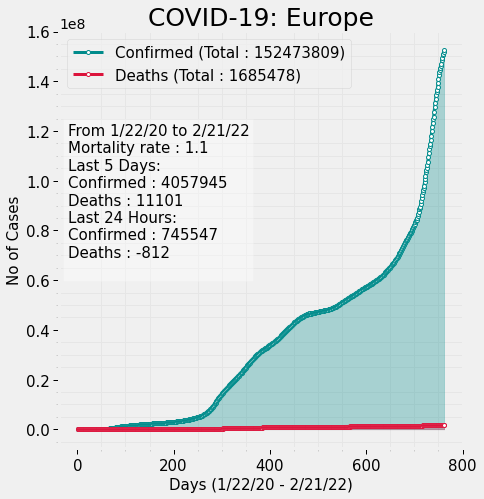

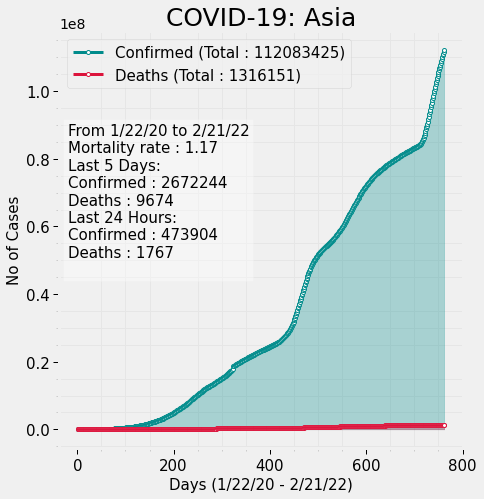

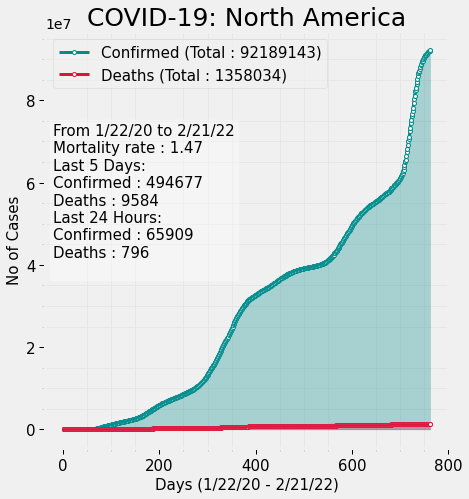

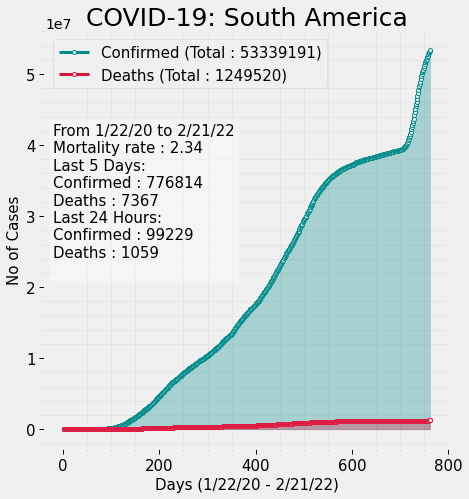

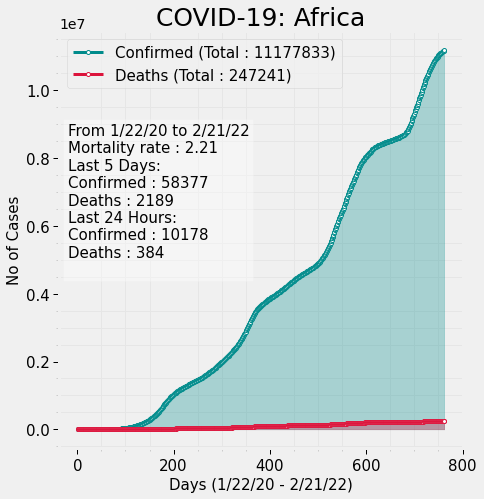

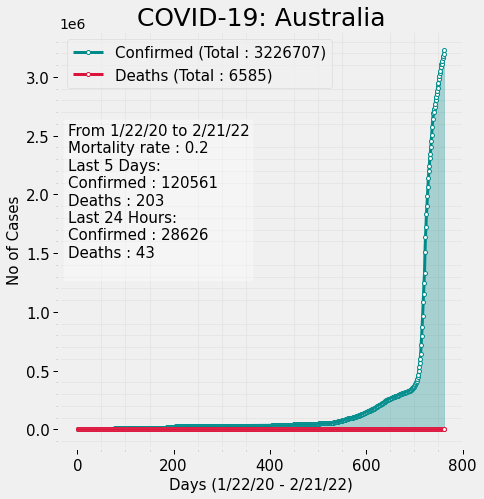

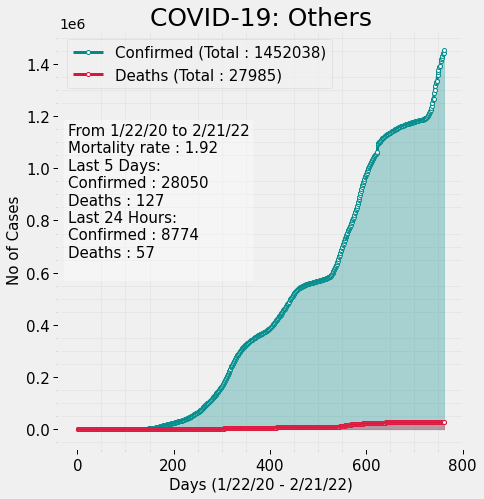

In [44]:
for i,cont in enumerate(continents):
    f = plt.figure(figsize=(10,10))
    visualize_covid_cases(confirmed_df, deaths_df, continent = cont,figure = [f,1,1, 1])


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

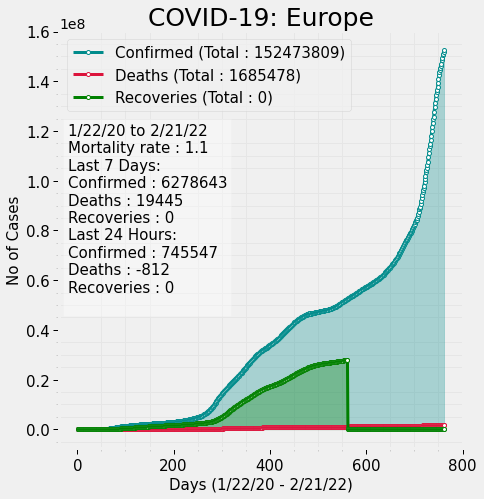

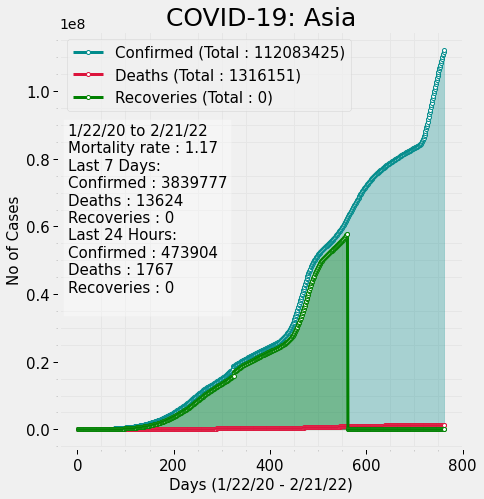

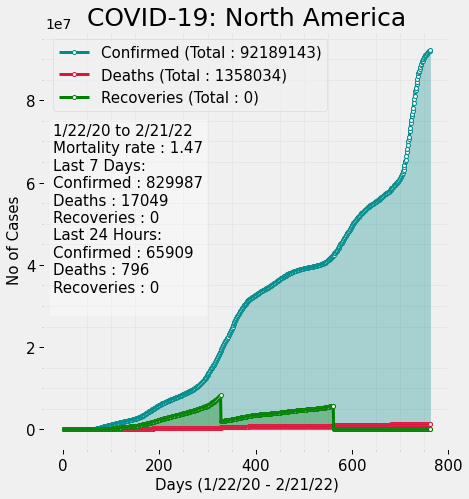

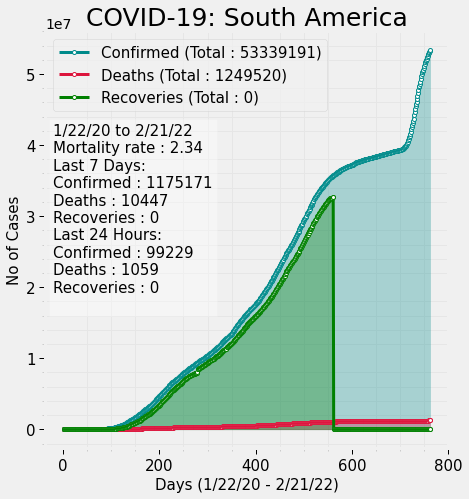

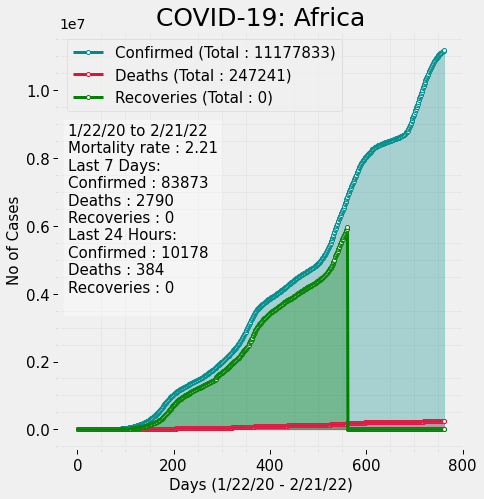

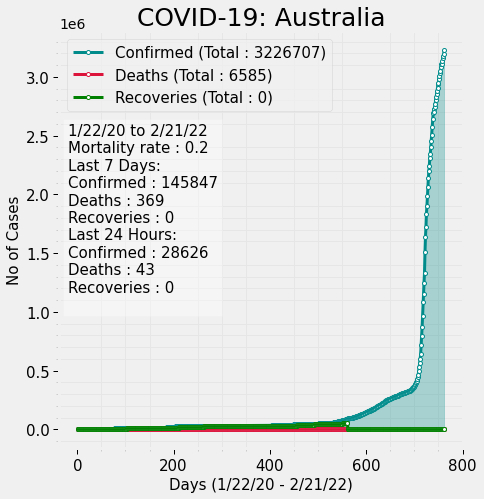

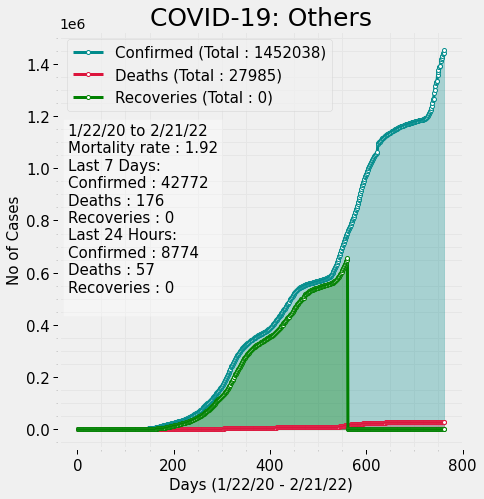

In [45]:
for i,cont in enumerate(continents):
    f = plt.figure(figsize=(10,10))
    visualize_covid_cases_new(confirmed_df, deaths_df, recoveries_df, continent = cont,figure = [f,1,1, 1])

# Problem 12
    Visualize the covariance matrix for continents_df.

In [46]:
continents_df

Confirmed   Deaths  Recoveries       Active  Mortality Rate
continent                                                                 
Africa          11177833   247241         0.0   10395088.0            2.21
Asia           112083425  1316151         0.0  107729082.0            1.17
Australia        3226707     6585         0.0    3220108.0            0.20
Europe         152473809  1685478         0.0  132252997.0            1.11
North America   92189143  1358034         0.0   90831109.0            1.47
Others           1452038    27985         0.0     795266.0            1.93
South America   53339191  1249520         0.0   50771723.0            2.34

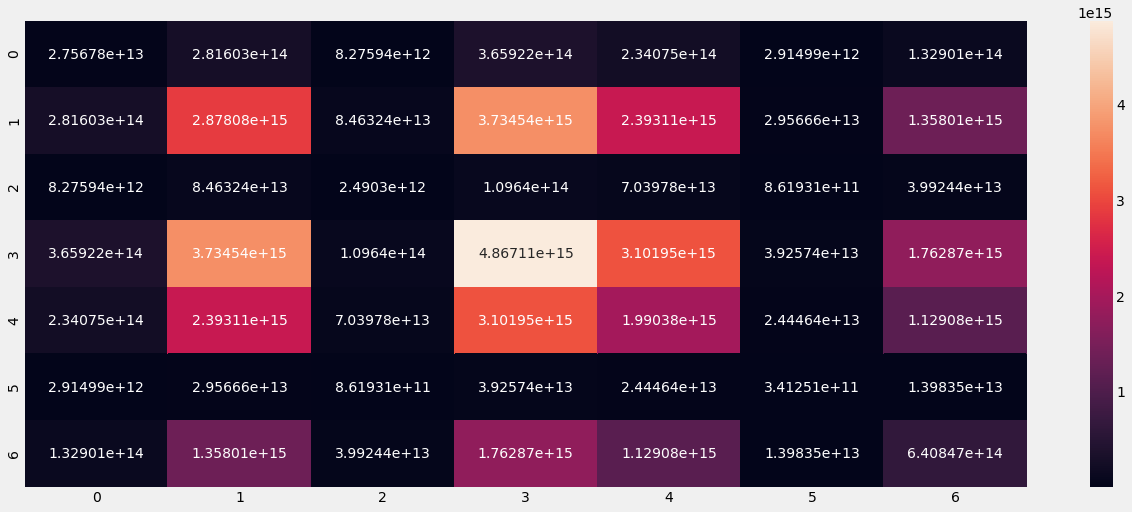

In [47]:
f, ax = plt.subplots(figsize=(20, 8))
covMatrix = np.cov(continents_df,bias=True)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [48]:
#choose only positive active case value
continents_df_copy = continents_df.copy()
continents_df_copy = continents_df_copy.iloc[:,0:4] 
continents_df_copy

Confirmed   Deaths  Recoveries       Active
continent                                                 
Africa          11177833   247241         0.0   10395088.0
Asia           112083425  1316151         0.0  107729082.0
Australia        3226707     6585         0.0    3220108.0
Europe         152473809  1685478         0.0  132252997.0
North America   92189143  1358034         0.0   90831109.0
Others           1452038    27985         0.0     795266.0
South America   53339191  1249520         0.0   50771723.0

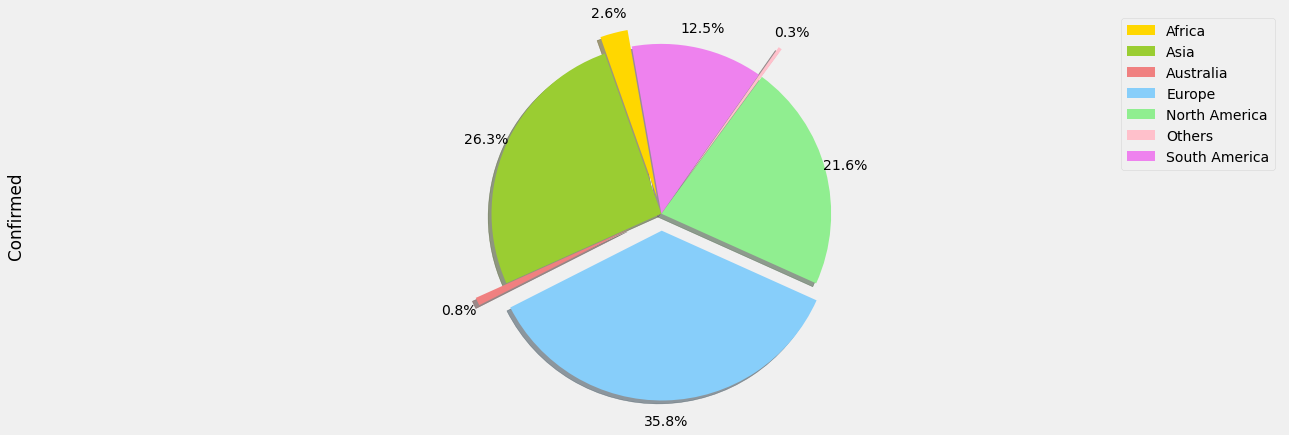

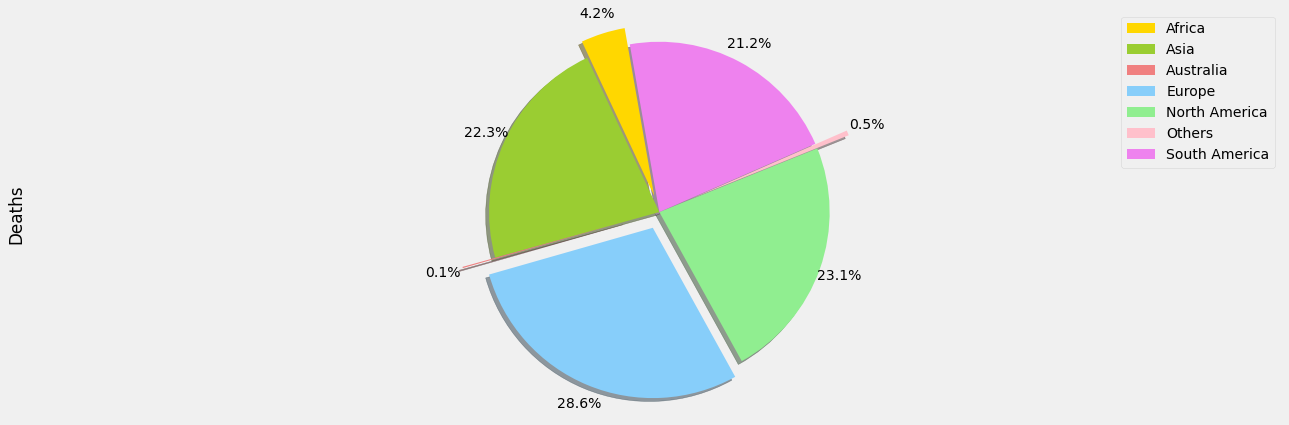

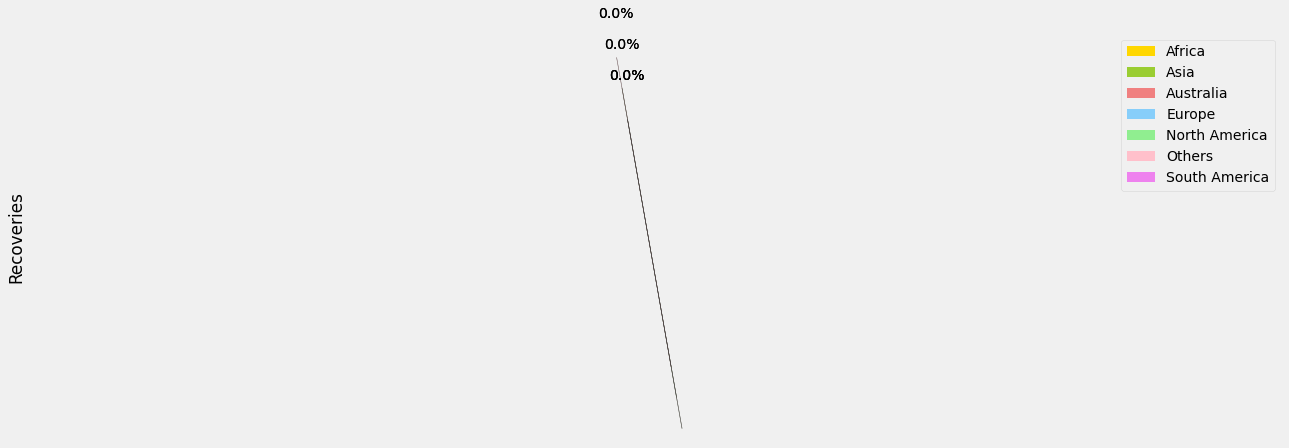

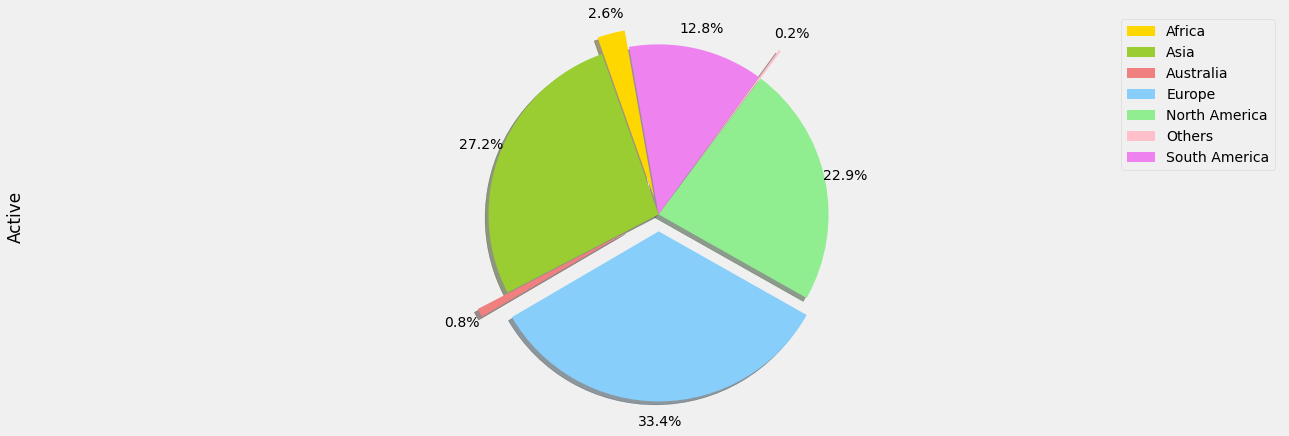

In [49]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','violet']
explode_list = [0.1, 0, 0.2, 0.1, 0, 0.2, 0]
for i in range(0,4):
    continents_df_copy.iloc[:,i].plot(kind='pie',
                                      figsize=(20, 7),
                                      autopct='%1.1f%%', 
                                      startangle=100,    
                                      shadow=True,       
                                      labels=None,         # turn off labels on pie chart
                                      pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                      colors=colors_list,  # add custom colors
                                      explode = explode_list)
    plt.axis('equal') 
    # add legend
    plt.legend(labels=continents_df.index, loc='upper right') 
    plt.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [50]:
location =  confirmed_df[['Country/Region','Lat','Long']].groupby(by='Country/Region').first()
location

Lat        Long
Country/Region                             
Afghanistan           33.939110   67.709953
Albania               41.153300   20.168300
Algeria               28.033900    1.659600
Andorra               42.506300    1.521800
Angola               -11.202700   17.873900
...                         ...         ...
West Bank and Gaza    31.952200   35.233200
Winter Olympics 2022  39.904200  116.407400
Yemen                 15.552727   48.516388
Zambia               -13.133897   27.849332
Zimbabwe             -19.015438   29.154857

[198 rows x 2 columns]

In [51]:
countries_df = pd.concat([countries_df,location],axis=1)
countries_df.reset_index
countries_df

continent  Confirmed  Deaths  Recoveries    Active  \
Country/Region                                                            
Afghanistan               Asia     172441    7549         0.0  164892.0   
Albania                 Europe     270370    3445         0.0  266925.0   
Algeria                 Africa     264201    6805         0.0  257396.0   
Andorra                 Europe      37589     150         0.0   37439.0   
Angola                  Africa      98658    1899         0.0   96759.0   
...                        ...        ...     ...         ...       ...   
West Bank and Gaza      Others     633684    5406         0.0       0.0   
Winter Olympics 2022    Others        509       0         0.0       0.0   
Yemen                     Asia      11741    2123         0.0       0.0   
Zambia                  Africa     311264    3945         0.0       0.0   
Zimbabwe                Africa     233571    5386         0.0       0.0   

                      Mortality Rate        Lat        Long  
Country/Region                                               
Afghanistan                     4.38  33.939110   67.709953  
Albania                         1.27  41.153300   20.168300  
Algeria                         2.58  28.033900    1.659600  
Andorra                         0.40  42.506300    1.521800  
Angola                          1.92 -11.202700   17.873900  
...                              ...        ...         ...  
West Bank and Gaza              0.85  31.952200   35.233200  
Winter Olympics 2022            0.00  39.904200  116.407400  
Yemen                          18.08  15.552727   48.516388  
Zambia                          1.27 -13.133897   27.849332  
Zimbabwe                        2.31 -19.015438   29.154857  

[198 rows x 8 columns]

In [52]:

map = folium.Map(location = [0,0], zoom_start=2, tiles='CartoDB positron')

for country, continent,confirmed,deaths,recoveries, active, mortalityrate, lat, long in zip(countries_df.index, countries_df['continent'], countries_df['Confirmed'], countries_df['Deaths'], countries_df['Recoveries'], countries_df['Active'], countries_df['Mortality Rate'], countries_df['Lat'], countries_df['Long']):
    #because it takes too long to show countries name in the map I used the continent information instead
    text = '''<b><h2>{0}</h2></b>
        <li>Confirmed: {1}</li>
        <li>Deaths: {2}</li>
        <li>Recovered: {3}</li>
        <li>Active: {4}</li>
        <li>Mortality Rate: {5:f}</li>'''.format(continent,confirmed,deaths,recoveries,active,mortalityrate)
    
    folium.Circle(location=[lat,long],
                  radius = confirmed /100, 
                  color='#e35614', 
                  fill=True,
                  popup = text,
                  fill_color = 'orange').add_to(map)
    
map

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [53]:
countries_df_copy2 = countries_df.copy().dropna()
#just get value greater than 0 so as to get log(10) value
countries_df_copy2 = countries_df_copy2.loc[countries_df_copy2['Active'] > 0] 
countries_df_copy2 = countries_df_copy2.groupby(['Country/Region']).sum().reset_index()
countries_df_copy2['Active'] = [math.log10(i) for i in countries_df_copy2['Active']]
countries_df_copy2

Country/Region  Confirmed  Deaths  Recoveries    Active  \
0             Afghanistan     172441    7549         0.0  5.217200   
1                 Albania     270370    3445         0.0  5.426389   
2                 Algeria     264201    6805         0.0  5.410602   
3                 Andorra      37589     150         0.0  4.573324   
4                  Angola      98658    1899         0.0  4.985691   
..                    ...        ...     ...         ...       ...   
183                   USA   78529099  935990         0.0  7.889823   
184                Uganda     163116    3585         0.0  5.202845   
185               Ukraine    4959461  111561         0.0  6.685554   
186  United Arab Emirates     875258    2296         0.0  5.940995   
187        United Kingdom   18785333  161179         0.0  4.948511   

     Mortality Rate        Lat        Long  
0              4.38  33.939110   67.709953  
1              1.27  41.153300   20.168300  
2              2.58  28.033900    1.659600  
3              0.40  42.506300    1.521800  
4              1.92 -11.202700   17.873900  
..              ...        ...         ...  
183            1.19  40.000000 -100.000000  
184            2.20   1.373333   32.290275  
185            2.25  48.379400   31.165600  
186            0.26  23.424076   53.847818  
187            0.86  18.220600  -63.068600  

[188 rows x 8 columns]

In [54]:
#Insert your code here:
fig = px.choropleth(countries_df_copy2, locations='Country/Region', locationmode='country names', 
                    scope='world', color='Active', 
                    color_continuous_scale= px.colors.diverging.Spectral,labels={'Active':'Active Cases'})
fig.show()


# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [55]:
countries_df

continent  Confirmed  Deaths  Recoveries    Active  \
Country/Region                                                            
Afghanistan               Asia     172441    7549         0.0  164892.0   
Albania                 Europe     270370    3445         0.0  266925.0   
Algeria                 Africa     264201    6805         0.0  257396.0   
Andorra                 Europe      37589     150         0.0   37439.0   
Angola                  Africa      98658    1899         0.0   96759.0   
...                        ...        ...     ...         ...       ...   
West Bank and Gaza      Others     633684    5406         0.0       0.0   
Winter Olympics 2022    Others        509       0         0.0       0.0   
Yemen                     Asia      11741    2123         0.0       0.0   
Zambia                  Africa     311264    3945         0.0       0.0   
Zimbabwe                Africa     233571    5386         0.0       0.0   

                      Mortality Rate        Lat        Long  
Country/Region                                               
Afghanistan                     4.38  33.939110   67.709953  
Albania                         1.27  41.153300   20.168300  
Algeria                         2.58  28.033900    1.659600  
Andorra                         0.40  42.506300    1.521800  
Angola                          1.92 -11.202700   17.873900  
...                              ...        ...         ...  
West Bank and Gaza              0.85  31.952200   35.233200  
Winter Olympics 2022            0.00  39.904200  116.407400  
Yemen                          18.08  15.552727   48.516388  
Zambia                          1.27 -13.133897   27.849332  
Zimbabwe                        2.31 -19.015438   29.154857  

[198 rows x 8 columns]

In [56]:
#Insert your code here:
top10_countries = countries_df.sort_values(by='Confirmed', inplace=False, ascending=False).iloc[0:10,:]
top10_countries

continent  Confirmed  \
Country/Region                                                                 
USA                                                 North America   78529099   
India                                                        Asia   42851929   
Brazil                                              South America   28258458   
France          EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...   22466076   
United Kingdom  EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...   18785333   
Russia                                                     Europe   15297628   
Germany                                                    Europe   13805197   
Turkey                                                       Asia   13589511   
Italy                                                      Europe   12494459   
Spain                                                      Europe   10858000   

                Deaths  Recoveries      Active  Mortality Rate        Lat  \
Country/Region                                                              
USA             935990         0.0  77593109.0            1.19  40.000000   
India           512344         0.0  42339585.0            1.20  20.593684   
Brazil          644918         0.0  27613540.0            2.28 -14.235000   
France          133663         0.0  22332413.0            0.59   3.933900   
United Kingdom  161179         0.0     88820.0            0.86  18.220600   
Russia          339319         0.0  14958309.0            2.22  61.524010   
Germany         121607         0.0  13683590.0            0.88  51.165691   
Turkey           92719         0.0  13496792.0            0.68  38.963700   
Italy           153190         0.0  12341269.0            1.23  41.871940   
Spain            98462         0.0  10759538.0            0.91  40.463667   

                      Long  
Country/Region              
USA            -100.000000  
India            78.962880  
Brazil          -51.925300  
France          -53.125800  
United Kingdom  -63.068600  
Russia          105.318756  
Germany          10.451526  
Turkey           35.243300  
Italy            12.567380  
Spain            -3.749220

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [57]:
top10_countries_copy = top10_countries[['Active','Recoveries','Deaths']]

Text(0.5, 0, 'Confirmed Cases')

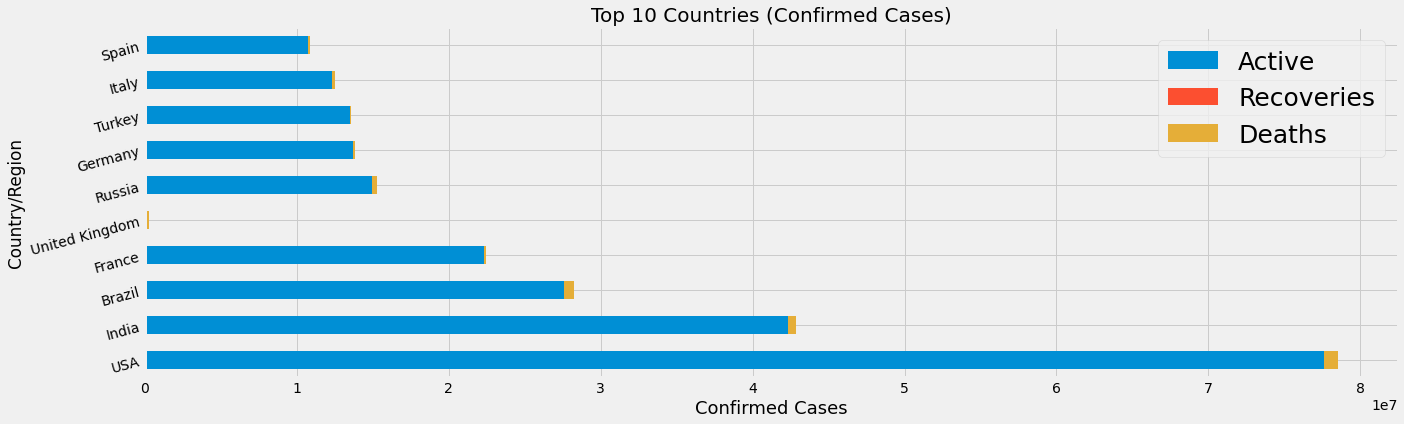

In [58]:
#Insert your code here:
fig = top10_countries_copy.plot.barh(stacked = True, rot = 15, figsize = (20,6))
fig.legend(loc=1, prop={'size':25})
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.xlabel("Confirmed Cases",fontsize=18)

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:
    
    

**The COVID 2019 epidemic in the world has not reached its peak because the confirmed cases and active cases keeps growing up, do not see any downside in the world total cases and daily increase**

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [59]:
#19.1 Which continent has the highest death rate over continents' active cases?
continents_df.sort_values('Mortality Rate',ascending=False)

Confirmed   Deaths  Recoveries       Active  Mortality Rate
continent                                                                 
South America   53339191  1249520         0.0   50771723.0            2.34
Africa          11177833   247241         0.0   10395088.0            2.21
Others           1452038    27985         0.0     795266.0            1.93
North America   92189143  1358034         0.0   90831109.0            1.47
Asia           112083425  1316151         0.0  107729082.0            1.17
Europe         152473809  1685478         0.0  132252997.0            1.11
Australia        3226707     6585         0.0    3220108.0            0.20

**Continent has the highest death rate over continents' active cases is South America**

In [60]:
#19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
active_before = confirmed_df.groupby(['continent']).sum() - recoveries_df.groupby(['continent']).sum() - deaths_df.groupby(['continent']).sum()
active_before = pd.DataFrame(active_before.iloc[:,-11 ])
active_before

confirmed_df_last10days = pd.DataFrame(confirmed_df.groupby(['continent']).sum().iloc[:,-1] - confirmed_df.groupby(['continent']).sum().iloc[:,-11], columns = ['confirmed_df_last10days'])

continents_spread_rate = pd.DataFrame(np.round(confirmed_df_last10days.iloc[:,0] * 100 / active_before.iloc[:,0] ,2), columns = ['spread_rate'])
continents_spread_rate.sort_values(by=['spread_rate'], inplace=True, ascending=False)
continents_spread_rate

spread_rate
continent                 
Australia             7.28
Europe                6.24
Asia                  5.04
Others                4.64
South America         3.28
North America         1.38
Africa                1.08

**Continent has the highest rate on COVID 2019 spread rate over continents' active cases is Australia**

In [61]:
#19.3 Which continent has the highest recoveries rate over continents' dataset?
continents_df['Recoveries_Rate'] = np.round(continents_df['Recoveries'] * 100 / continents_df['Confirmed'],2)
continents_df.sort_values('Recoveries_Rate', inplace=True, ascending=False)
continents_df

Confirmed   Deaths  Recoveries       Active  Mortality Rate  \
continent                                                                    
Africa          11177833   247241         0.0   10395088.0            2.21   
Asia           112083425  1316151         0.0  107729082.0            1.17   
Australia        3226707     6585         0.0    3220108.0            0.20   
Europe         152473809  1685478         0.0  132252997.0            1.11   
North America   92189143  1358034         0.0   90831109.0            1.47   
Others           1452038    27985         0.0     795266.0            1.93   
South America   53339191  1249520         0.0   50771723.0            2.34   

               Recoveries_Rate  
continent                       
Africa                     0.0  
Asia                       0.0  
Australia                  0.0  
Europe                     0.0  
North America              0.0  
Others                     0.0  
South America              0.0

**There is no recoveries rate per continent to evaluate which continent has the highest recoveries rate over continent's dataset**

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [62]:
#20.1 Which country has the highest death rate over countries' dataset?
countries_df.sort_values('Mortality Rate', inplace=True, ascending=False)
countries_df

continent  Confirmed  Deaths  Recoveries     Active  \
Country/Region                                                                  
MS Zaandam                   Others          9       2         0.0        7.0   
Yemen                          Asia      11741    2123         0.0        0.0   
Vanuatu                   Australia         15       1         0.0        0.0   
Sudan                        Africa      61223    3892         0.0    57331.0   
Peru                  South America    3497896  209641         0.0  3288255.0   
...                             ...        ...     ...         ...        ...   
Holy See                     Others         29       0         0.0       29.0   
Antarctica                   Others         11       0         0.0       11.0   
Summer Olympics 2020         Others        865       0         0.0      865.0   
Winter Olympics 2022         Others        509       0         0.0        0.0   
Tonga                     Australia        234       0         0.0      234.0   

                      Mortality Rate        Lat        Long  
Country/Region                                               
MS Zaandam                     22.22   0.000000    0.000000  
Yemen                          18.08  15.552727   48.516388  
Vanuatu                         6.67 -15.376700  166.959200  
Sudan                           6.36  12.862800   30.217600  
Peru                            5.99  -9.190000  -75.015200  
...                              ...        ...         ...  
Holy See                        0.00  41.902900   12.453400  
Antarctica                      0.00 -71.949900   23.347000  
Summer Olympics 2020            0.00  35.649100  139.773700  
Winter Olympics 2022            0.00  39.904200  116.407400  
Tonga                           0.00 -21.179000 -175.198200  

[198 rows x 8 columns]

**Country has the highest death rate over countries's dataset is MS Zaandam**

In [63]:
#20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
active_before = confirmed_df.groupby(['Country/Region']).sum() - recoveries_df.groupby(['Country/Region']).sum() - deaths_df.groupby(['Country/Region']).sum()
active_before = pd.DataFrame(active_before.iloc[:,-11 ])
active_before

confirmed_df_last10days = pd.DataFrame(confirmed_df.groupby(['Country/Region']).sum().iloc[:,-1] - confirmed_df.groupby(['Country/Region']).sum().iloc[:,-11], columns = ['confirmed_df_last10days'])

continents_spread_rate = pd.DataFrame(np.round(confirmed_df_last10days.iloc[:,0] * 100 / active_before.iloc[:,0] ,2), columns = ['spread_rate'])
continents_spread_rate.sort_values(by=['spread_rate'], inplace=True, ascending=False)
continents_spread_rate

spread_rate
Country/Region                   
Tonga                      220.55
Vanuatu                    133.33
Brunei                      85.20
New Zealand                 83.06
South Korea                 67.09
...                           ...
Antarctica                   0.00
Mauritius                    0.00
Micronesia                   0.00
Summer Olympics 2020         0.00
Diamond Princess             0.00

[198 rows x 1 columns]

**Continent has the highest rate on COVID 2019 spread rate over countries' dataset is Tonga**

In [64]:
#20.3 Which country has the highest recoveries rate over countries' dataset?
countries_df['Recoveries_Rate'] = np.round(countries_df['Recoveries'] * 100 / countries_df['Confirmed'],2)
countries_df.sort_values('Recoveries_Rate', inplace=True, ascending=False)
countries_df

continent  Confirmed  Deaths  Recoveries      Active  \
Country/Region                                                             
MS Zaandam             Others          9       2         0.0         7.0   
Spain                  Europe   10858000   98462         0.0  10759538.0   
Germany                Europe   13805197  121607         0.0  13683590.0   
Jordan                   Asia    1582161   13713         0.0   1568448.0   
Latvia                 Europe     589763    5113         0.0    584650.0   
...                       ...        ...     ...         ...         ...   
Cameroon               Africa     119107    1920         0.0    117187.0   
Ethiopia               Africa     468379    7440         0.0    460939.0   
Grenada         North America      13532     214         0.0     13318.0   
Saint Lucia     North America      22545     357         0.0     22188.0   
Tonga               Australia        234       0         0.0       234.0   

                Mortality Rate        Lat        Long  Recoveries_Rate  
Country/Region                                                          
MS Zaandam               22.22   0.000000    0.000000              0.0  
Spain                     0.91  40.463667   -3.749220              0.0  
Germany                   0.88  51.165691   10.451526              0.0  
Jordan                    0.87  31.240000   36.510000              0.0  
Latvia                    0.87  56.879600   24.603200              0.0  
...                        ...        ...         ...              ...  
Cameroon                  1.61   3.848000   11.502100              0.0  
Ethiopia                  1.59   9.145000   40.489700              0.0  
Grenada                   1.58  12.116500  -61.679000              0.0  
Saint Lucia               1.58  13.909400  -60.978900              0.0  
Tonga                     0.00 -21.179000 -175.198200              0.0  

[198 rows x 9 columns]

**There is no recoveries rate per country to evaluate which country has the highest recoveries rate over countries' dataset**

# Problem 21
**USA dataset**

In [65]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
2             American Samoa             US  2020-07-07 04:34:13 -14.2710   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
5                 California             US  2020-07-07 04:34:13  36.1162   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US  2020-07-07 04:34:13      NaN   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
11                   Florida             US  2020-07-07 04:34:13  27.7663   
12                   Georgia             US  2020-07-07 04:34:13  33.0406   
13            Grand Princess             US  2020-07-07 04:34:13      NaN   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
36                  New York             US  2020-07-07 04:34:13  42.1657   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US  2020-07-07 04:34:13  18.2208   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
51        

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset? 

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [66]:
#21.1 Which state has the highest death rate over states' dataset?
us_medical_data_sort = us_medical_data.sort_values('Mortality_Rate', ascending=False)
us_medical_data_sort

**State that has the highest death rate over states' dataset is Connecticut**

In [67]:
#21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
# Calculate and sort spread_rate
us_medical_data_sort["Spread_rate"] = np.round(100 * us_medical_data_sort["Confirmed"] / us_medical_data_sort["Active"], 2)
us_medical_data_sort.sort_values(by=['Spread_rate'], ascending=False)
us_medical_data_sort

Province_State Country_Region          Last_Update      Lat  \
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
51                   Vermont             US  2020-07-07 04:34:13  44.0459   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
56                 Wisconsin             US  2020-07-07 04:34:13  44.2685   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
55             West Virginia             US  2020-07-07 04:34:13  38.4912   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
52            Virgin Islands             US  2020-07-07 04:34:13  18.3358   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
57                   Wyoming             US  2020-07-07 04:34:13  42.7560   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
36                  New York             US  2020-07-07 04:34:13  42.1657   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
53                  Virginia             US  2020-07-07 04:34:13  37.7693   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
54                Washington             US  2020-07-07 04:34:13  47.4009   
12        

**State has the highest rate on COVID 2019 spread rate over states's dataset is Massachusetts**

In [68]:
#21.3 Which state has the highest recoveries rate over states' dataset?
us_medical_data_sort['Recoveries_Rate'] = us_medical_data_sort['Recovered'] * 100 / us_medical_data_sort['Confirmed']
us_medical_data_sort.sort_values('Recoveries_Rate', ascending=False)
us_medical_data_sort

Province_State Country_Region          Last_Update      Lat  \
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
51                   Vermont             US  2020-07-07 04:34:13  44.0459   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
56                 Wisconsin             US  2020-07-07 04:34:13  44.2685   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
55             West Virginia             US  2020-07-07 04:34:13  38.4912   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
52            Virgin Islands             US  2020-07-07 04:34:13  18.3358   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
57                   Wyoming             US  2020-07-07 04:34:13  42.7560   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
36                  New York             US  2020-07-07 04:34:13  42.1657   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
53                  Virginia             US  2020-07-07 04:34:13  37.7693   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
54                Washington             US  2020-07-07 04:34:13  47.4009   
12        

**State has the highest recoveries rate over states' dataset is Minnesota**

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.